In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import sklearn
plt.rcParams["figure.figsize"] = (18,9)

In [3]:
df= pd.read_csv('train.csv')

In [59]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,0,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,0,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,0,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,0,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,0,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


df.describe()

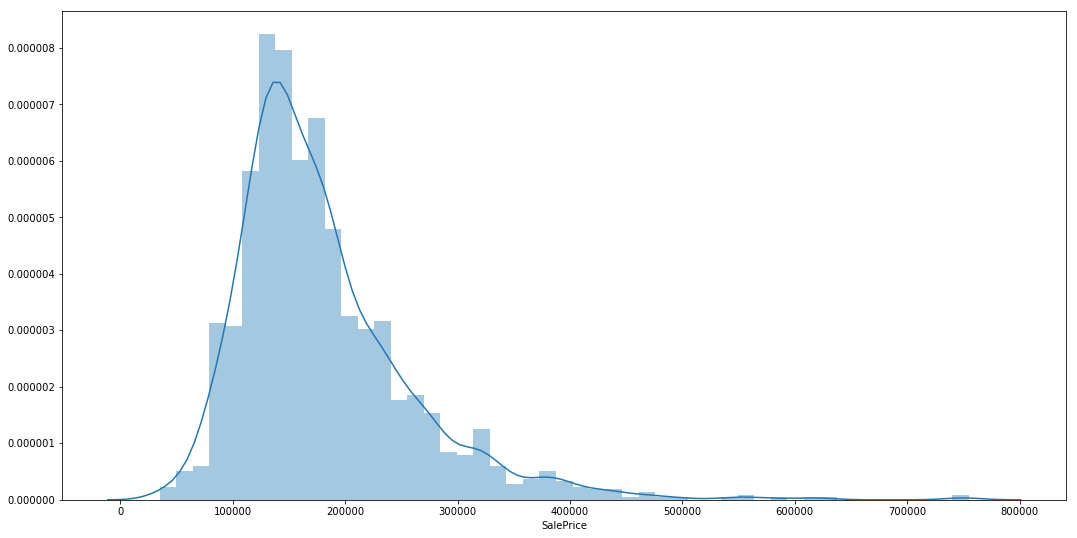

In [21]:
sns.distplot(df['SalePrice'])

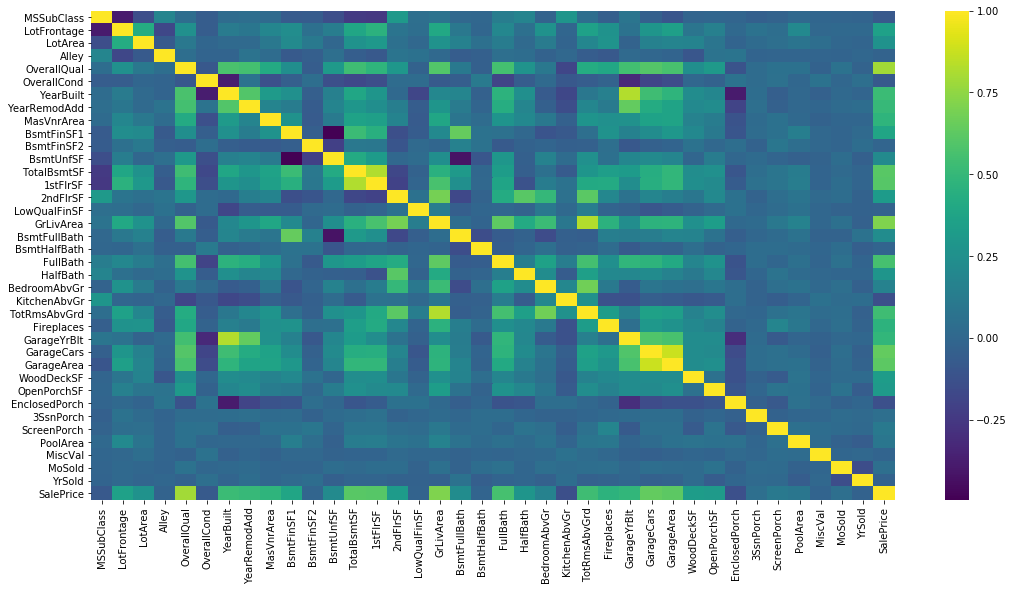

In [58]:
sns.heatmap(df.corr(), cmap='viridis')

In [27]:
df.drop('Id',axis=1, inplace=True)

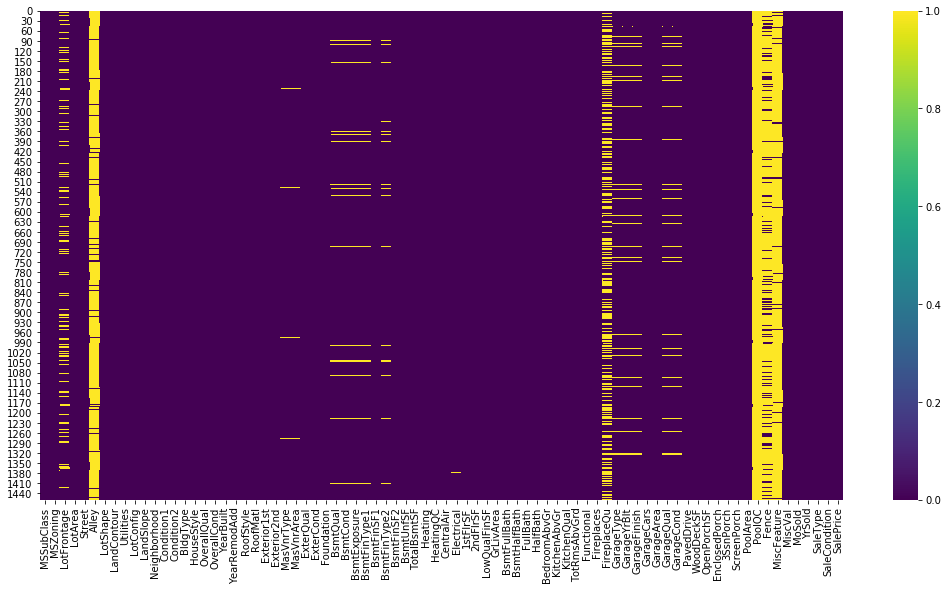

In [31]:
sns.heatmap(df.isnull(), cmap='viridis')

In [50]:
def isPave(x):
    if x == 'Pave':
        return 1
    else:
        return 0 

In [46]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [52]:
df['Alley'] = df['Alley'].apply(isPave)

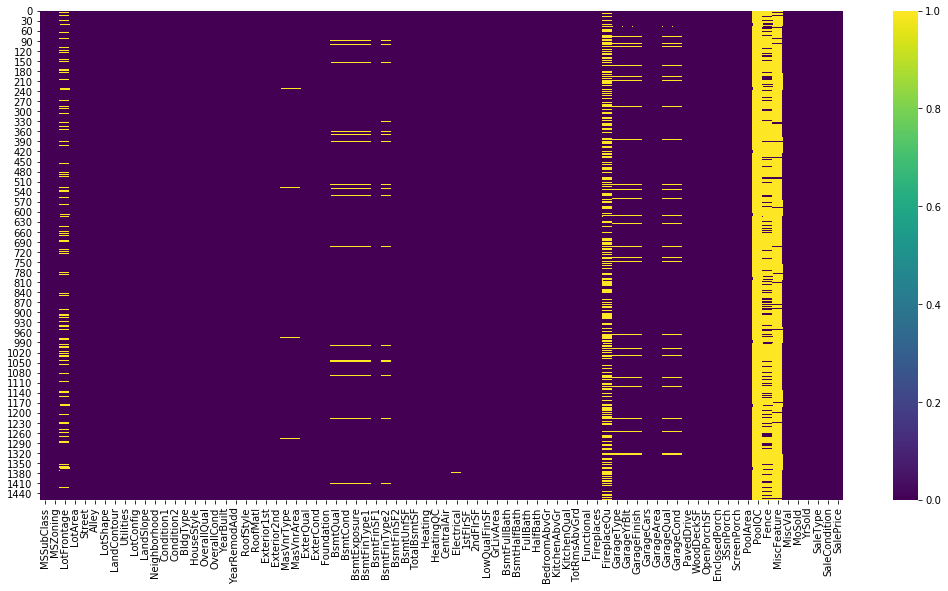

In [54]:
sns.heatmap(df.isnull(), cmap='viridis')

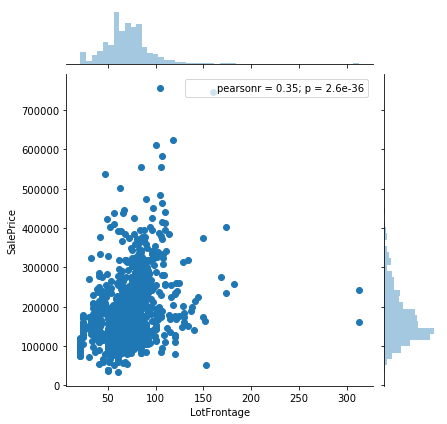

In [57]:
sns.jointplot(df['LotFrontage'], df['SalePrice'])

In [62]:
df['MSZoning'].nunique()

5

In [67]:
df= pd.get_dummies(df, prefix='MSZone_', columns=['MSZoning'])
df_with_dummies.head(10)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning__C (all),MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM
0,60,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,...,2,2008,WD,Normal,208500,0,0,0,1,0
1,20,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,...,5,2007,WD,Normal,181500,0,0,0,1,0
2,60,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,...,9,2008,WD,Normal,223500,0,0,0,1,0
3,70,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,...,2,2006,WD,Abnorml,140000,0,0,0,1,0
4,60,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,...,12,2008,WD,Normal,250000,0,0,0,1,0
5,50,85.0,14115,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,...,10,2009,WD,Normal,143000,0,0,0,1,0
6,20,75.0,10084,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,...,8,2007,WD,Normal,307000,0,0,0,1,0
7,60,NaN,10382,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,...,11,2009,WD,Normal,200000,0,0,0,1,0
8,50,51.0,6120,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,...,4,2008,WD,Abnorml,129900,0,0,0,0,1
9,190,50.0,7420,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,...,1,2008,WD,Normal,118000,0,0,0,1,0
